In [1]:
import numpy as np

import clima_anom as ca

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
data_dir = '/mnt/Data/Data/GLM/SA/GLM_2018_03_2021_02_24h_05x05.nc'
data = ca.read_netcdf(data_dir,2)
lat = data['lat']
lon = data['lon']
tim = data['time']
flash = data['flash'].data

lon2d, lat2d = np.meshgrid(lon, lat)
ntime, nlat, nlon = np.shape(flash)

time : (1096,)
time_bnds : (1096, 2)
lon : (110,)
lat : (110,)
flash : (1096, 110, 110)


In [3]:
def flash_month_interval(data_in,time_vector,year_start,month_start):
    tmp = []
    _, nlat, nlon = np.shape(data_in)
    ntime = len(time_vector)

    for t in range(ntime):
        if time_vector[t].month == month_start and time_vector[t].year == year_start:
            tmp.append(data_in[t,:,:].data)

    salida = np.zeros([len(tmp),nlat,nlon])
    for t in range(len(tmp)):
        salida[t] = tmp[t]

    salida_mean = np.mean(salida,axis=0)

    return salida, salida_mean

In [37]:
flash_2018 = np.zeros([12,nlat,nlon])

for t in range(2,12):
    _, flash_2018[t,:,:] = flash_month_interval(flash,tim,2018,t+1)

../images/GLM_monthly_2018.png


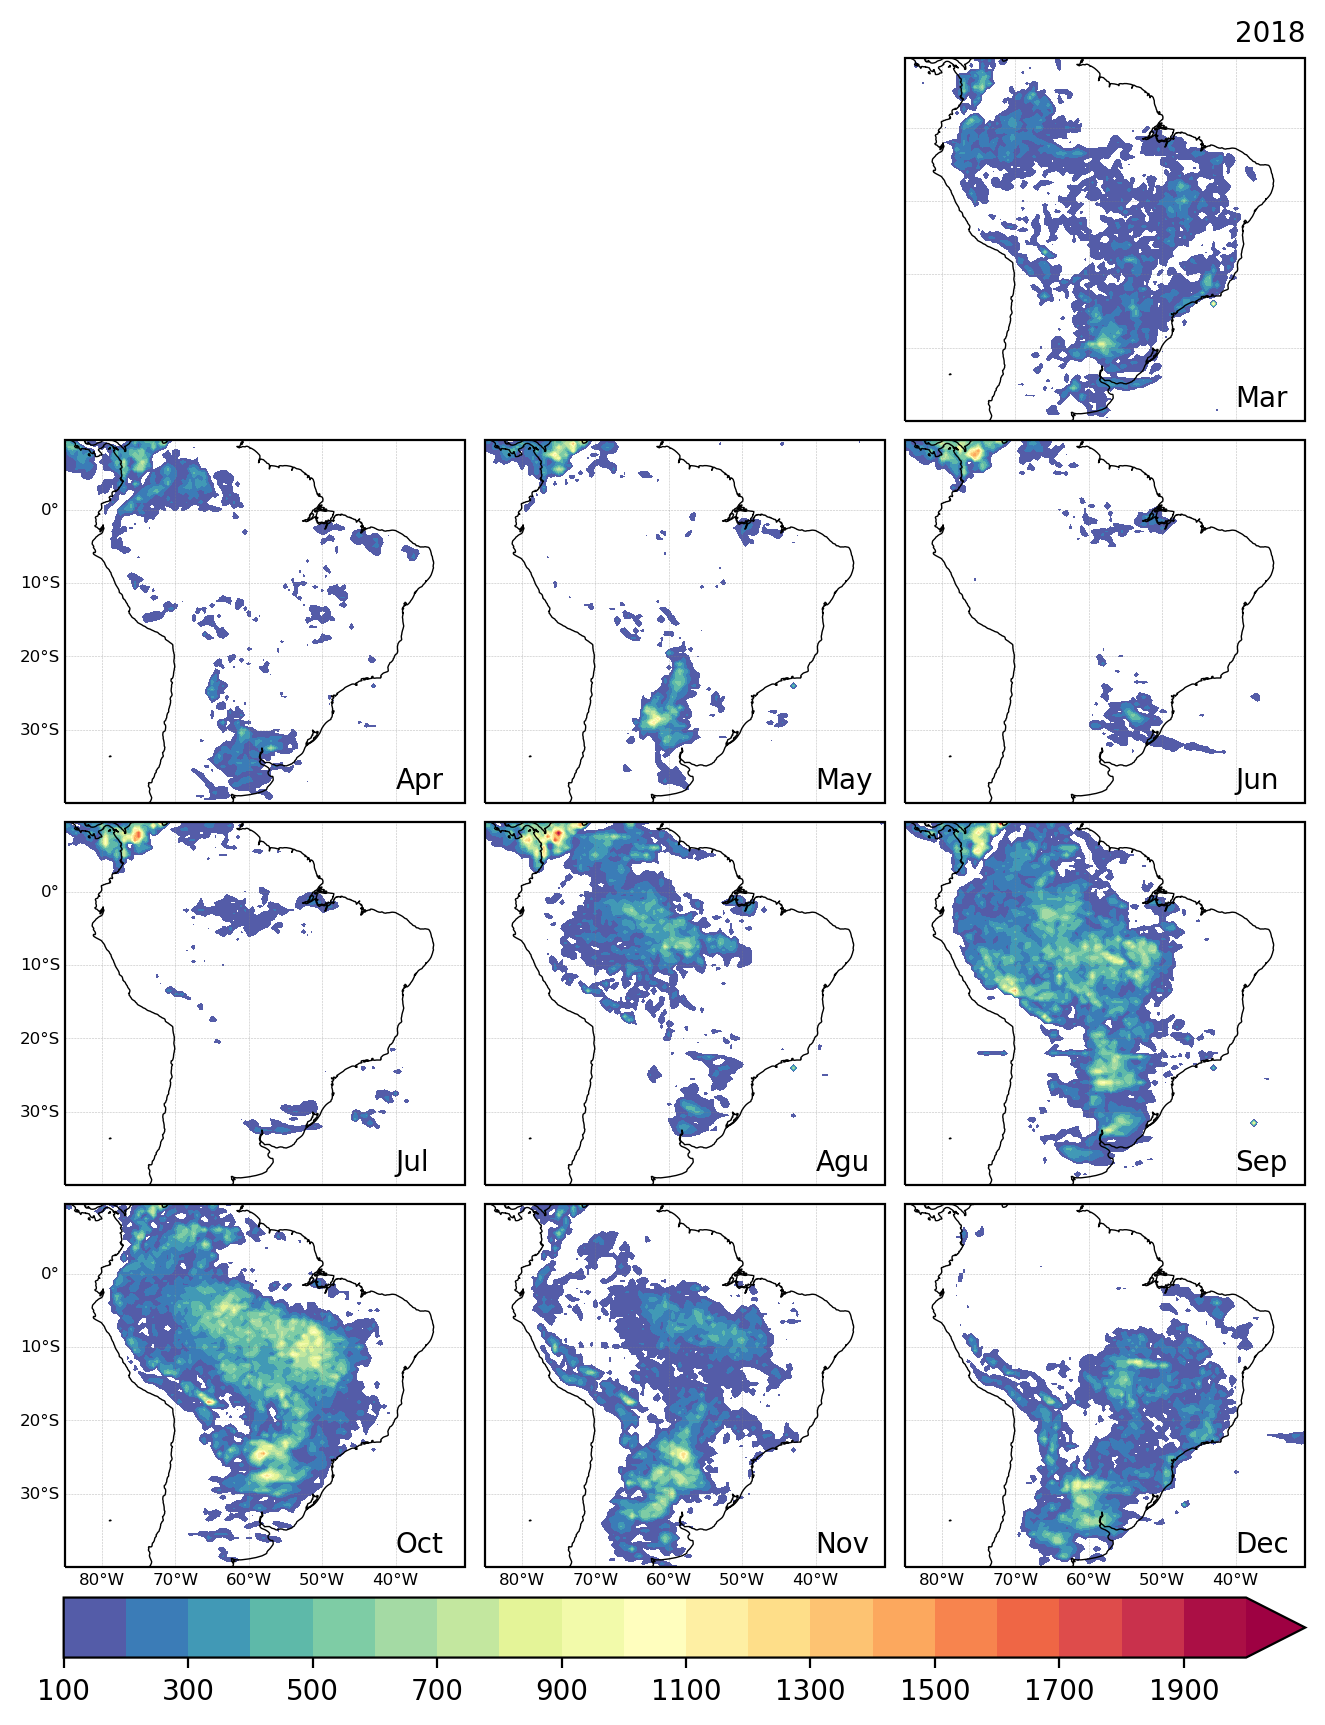

In [38]:
linewidth_shape = 0.2

flash_lvl = np.arange(100,2100,100)

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

fig = plt.figure(figsize=(8,10),dpi=200)
gs = gridspec.GridSpec(4,3)

# =====================================================================================================================================

# ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([-85,-30.5,-40,9.5],crs=proj)
# ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.add_feature(cf.BORDERS,linewidth=0.5)
# a1 = ax1.contourf(lon2d,lat2d,flash_2018[0,:,:],cmap=cmap,levels=flash_lvl,extend='max')
# gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.left_labels = True
# gl.right_labels = False
# gl.xlabel_style = {'size': 6, 'color': 'k'}
# gl.ylabel_style = {'size': 6, 'color': 'k'}
# # cbar1 = plt.colorbar(a1,fraction=0.045)
# # cbar1.ax.tick_params(labelsize=7, pad=0.04)
# ax1.annotate('Jan', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

# ax2 = plt.subplot(gs[0, 1], projection = proj)
# ax2.set_extent([-85,-30.5,-40,9.5],crs=proj)
# ax2.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax2.add_feature(cf.BORDERS,linewidth=0.5)
# a2 = ax2.contourf(lon2d,lat2d,flash_2018[1,:,:],cmap=cmap,levels=flash_lvl,extend='max')
# gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
# gl.top_labels = False
# gl.bottom_labels = False
# gl.left_labels = False
# gl.right_labels = False
# gl.xlabel_style = {'size': 6, 'color': 'k'}
# gl.ylabel_style = {'size': 6, 'color': 'k'}
# # cbar2 = plt.colorbar(a2,fraction=0.045)
# # cbar2.ax.tick_params(labelsize=7, pad=0.04)
# ax2.annotate('Feb', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax3 = plt.subplot(gs[0, 2], projection = proj)
ax3.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax3.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax3.add_feature(cf.BORDERS,linewidth=0.5)
a3 = ax3.contourf(lon2d,lat2d,flash_2018[2,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar3 = plt.colorbar(a3,fraction=0.045)
# cbar3.ax.tick_params(labelsize=7, pad=0.04)
ax3.set_title('2018', loc='right',fontsize=10)
ax3.annotate('Mar', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

# =====================================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.add_feature(cf.BORDERS,linewidth=0.5)
a1 = ax1.contourf(lon2d,lat2d,flash_2018[3,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar1 = plt.colorbar(a1,fraction=0.045)
# cbar1.ax.tick_params(labelsize=7, pad=0.04)
ax1.annotate('Apr', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax2 = plt.subplot(gs[1, 1], projection = proj)
ax2.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax2.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax2.add_feature(cf.BORDERS,linewidth=0.5)
a2 = ax2.contourf(lon2d,lat2d,flash_2018[4,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar2 = plt.colorbar(a2,fraction=0.045)
# cbar2.ax.tick_params(labelsize=7, pad=0.04)
ax2.annotate('May', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax3 = plt.subplot(gs[1, 2], projection = proj)
ax3.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax3.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax3.add_feature(cf.BORDERS,linewidth=0.5)
a3 = ax3.contourf(lon2d,lat2d,flash_2018[5,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar3 = plt.colorbar(a3,fraction=0.045)
# cbar3.ax.tick_params(labelsize=7, pad=0.04)
ax3.annotate('Jun', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

# =====================================================================================================================================
ax1 = plt.subplot(gs[2, 0], projection = proj)
ax1.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.add_feature(cf.BORDERS,linewidth=0.5)
a1 = ax1.contourf(lon2d,lat2d,flash_2018[6,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar1 = plt.colorbar(a1,fraction=0.045)
# cbar1.ax.tick_params(labelsize=7, pad=0.04)
ax1.annotate('Jul', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax2 = plt.subplot(gs[2, 1], projection = proj)
ax2.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax2.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax2.add_feature(cf.BORDERS,linewidth=0.5)
a2 = ax2.contourf(lon2d,lat2d,flash_2018[7,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar2 = plt.colorbar(a2,fraction=0.045)
# cbar2.ax.tick_params(labelsize=7, pad=0.04)
ax2.annotate('Agu', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax3 = plt.subplot(gs[2, 2], projection = proj)
ax3.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax3.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax3.add_feature(cf.BORDERS,linewidth=0.5)
a3 = ax3.contourf(lon2d,lat2d,flash_2018[8,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar3 = plt.colorbar(a3,fraction=0.045)
# cbar3.ax.tick_params(labelsize=7, pad=0.04)
ax3.annotate('Sep', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

# =====================================================================================================================================
ax1 = plt.subplot(gs[3, 0], projection = proj)
ax1.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.add_feature(cf.BORDERS,linewidth=0.5)
a1 = ax1.contourf(lon2d,lat2d,flash_2018[9,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar1 = plt.colorbar(a1,fraction=0.045)
# cbar1.ax.tick_params(labelsize=7, pad=0.04)
ax1.annotate('Oct', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax2 = plt.subplot(gs[3, 1], projection = proj)
ax2.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax2.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax2.add_feature(cf.BORDERS,linewidth=0.5)
a2 = ax2.contourf(lon2d,lat2d,flash_2018[10,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar2 = plt.colorbar(a2,fraction=0.045)
# cbar2.ax.tick_params(labelsize=7, pad=0.04)
ax2.annotate('Nov', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax3 = plt.subplot(gs[3, 2], projection = proj)
ax3.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax3.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax3.add_feature(cf.BORDERS,linewidth=0.5)
a3 = ax3.contourf(lon2d,lat2d,flash_2018[11,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar3 = plt.colorbar(a3,fraction=0.045)
# cbar3.ax.tick_params(labelsize=7, pad=0.04)
ax3.annotate('Dec', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.08, 0.776, 0.03]) 
fig.colorbar(a1, cax = cbaxes,orientation="horizontal")

salida = '../images/GLM_monthly_2018.png'
print(salida)
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0, facecolor='white')


In [39]:
flash_2019 = np.zeros([12,nlat,nlon])

for t in range(12):
    _, flash_2019[t,:,:] = flash_month_interval(flash,tim,2019,t+1)

../images/GLM_monthly_2019.png


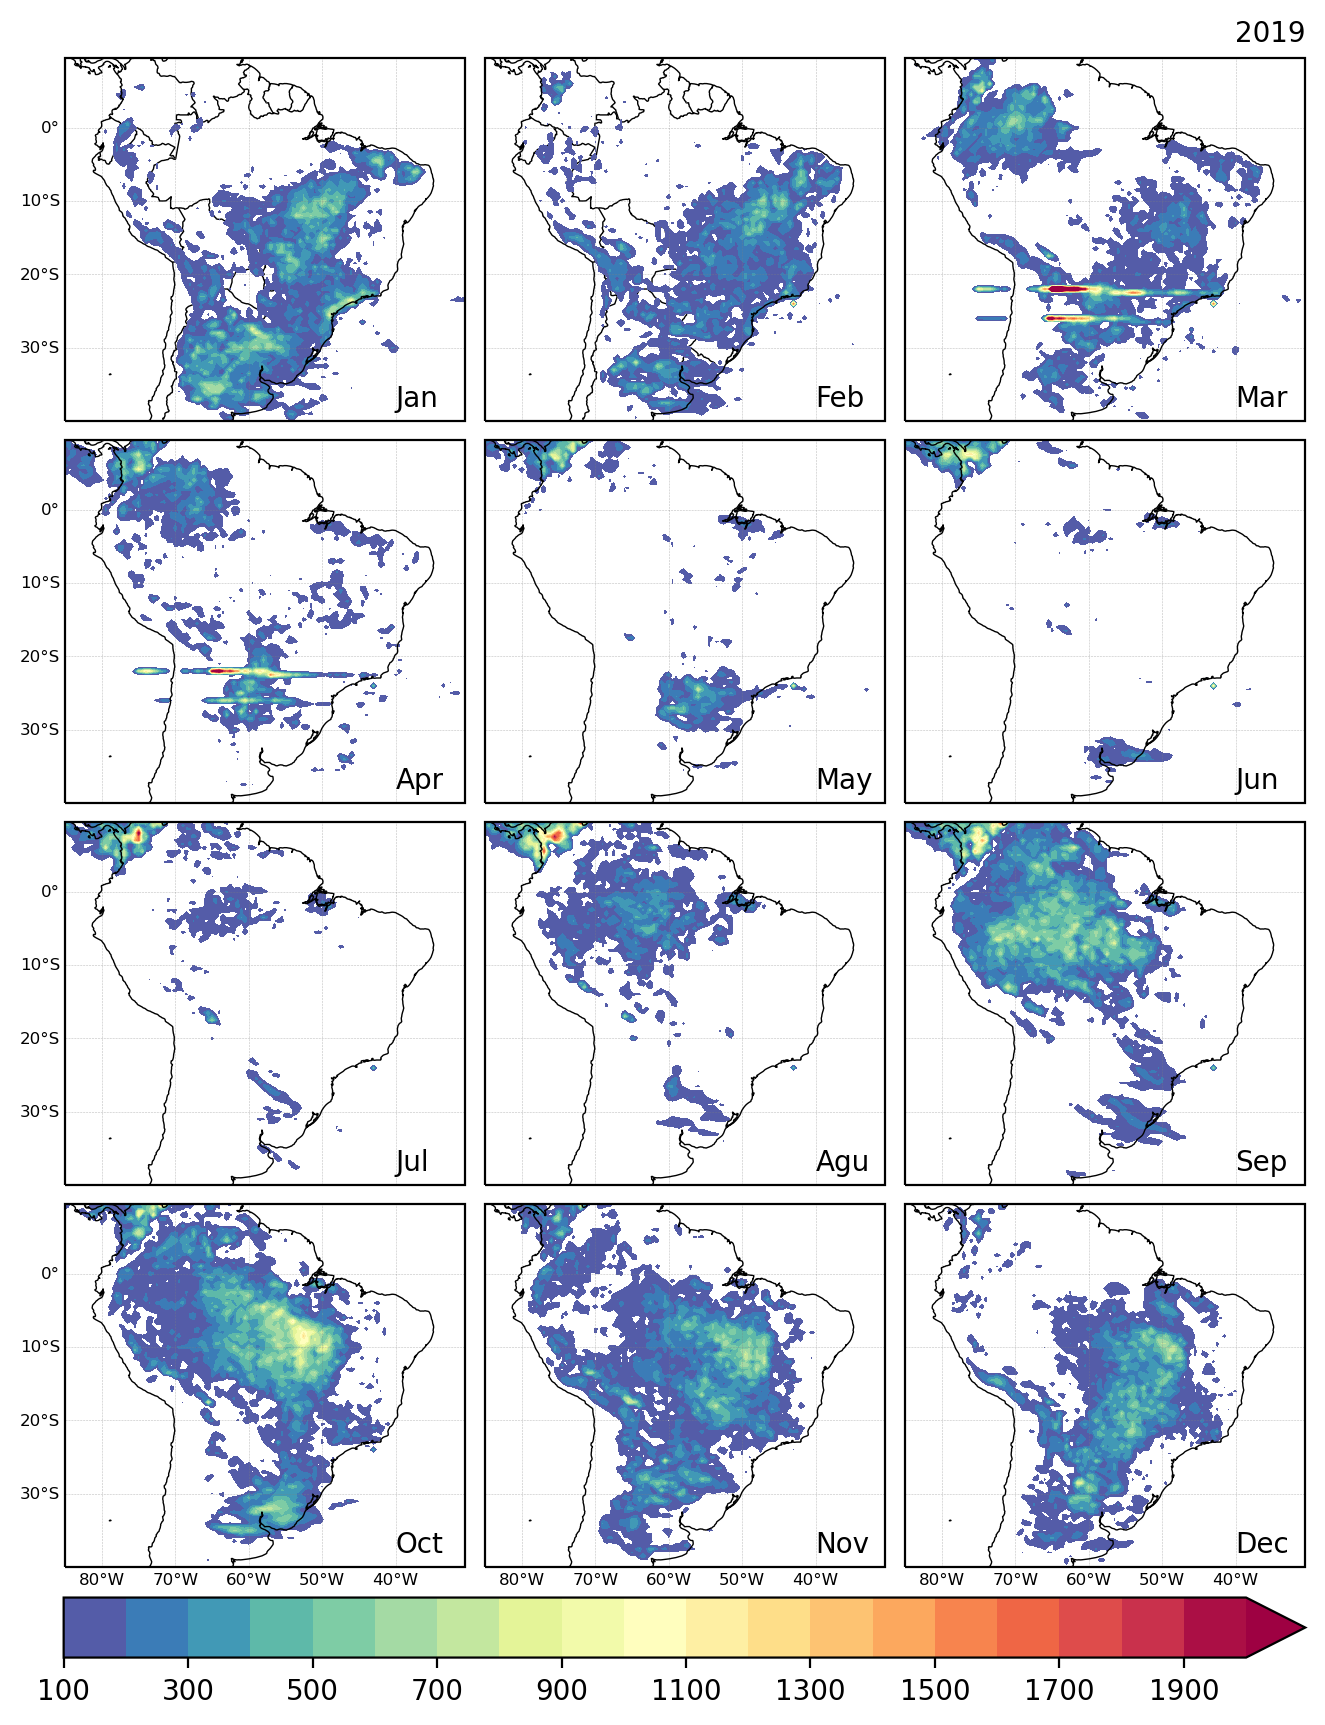

In [40]:
linewidth_shape = 0.2

flash_lvl = np.arange(100,2100,100)

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

fig = plt.figure(figsize=(8,10),dpi=200)
gs = gridspec.GridSpec(4,3)

# =====================================================================================================================================

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cf.BORDERS,linewidth=0.5)
a1 = ax1.contourf(lon2d,lat2d,flash_2019[0,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar1 = plt.colorbar(a1,fraction=0.045)
# cbar1.ax.tick_params(labelsize=7, pad=0.04)
ax1.annotate('Jan', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax2 = plt.subplot(gs[0, 1], projection = proj)
ax2.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax2.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cf.BORDERS,linewidth=0.5)
a2 = ax2.contourf(lon2d,lat2d,flash_2019[1,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar2 = plt.colorbar(a2,fraction=0.045)
# cbar2.ax.tick_params(labelsize=7, pad=0.04)
ax2.annotate('Feb', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax3 = plt.subplot(gs[0, 2], projection = proj)
ax3.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax3.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax3.add_feature(cf.BORDERS,linewidth=0.5)
a3 = ax3.contourf(lon2d,lat2d,flash_2019[2,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar3 = plt.colorbar(a3,fraction=0.045)
# cbar3.ax.tick_params(labelsize=7, pad=0.04)
ax3.set_title('2019', loc='right',fontsize=10)
ax3.annotate('Mar', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

# =====================================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.add_feature(cf.BORDERS,linewidth=0.5)
a1 = ax1.contourf(lon2d,lat2d,flash_2019[3,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar1 = plt.colorbar(a1,fraction=0.045)
# cbar1.ax.tick_params(labelsize=7, pad=0.04)
ax1.annotate('Apr', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax2 = plt.subplot(gs[1, 1], projection = proj)
ax2.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax2.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax2.add_feature(cf.BORDERS,linewidth=0.5)
a2 = ax2.contourf(lon2d,lat2d,flash_2019[4,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar2 = plt.colorbar(a2,fraction=0.045)
# cbar2.ax.tick_params(labelsize=7, pad=0.04)
ax2.annotate('May', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax3 = plt.subplot(gs[1, 2], projection = proj)
ax3.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax3.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax3.add_feature(cf.BORDERS,linewidth=0.5)
a3 = ax3.contourf(lon2d,lat2d,flash_2019[5,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar3 = plt.colorbar(a3,fraction=0.045)
# cbar3.ax.tick_params(labelsize=7, pad=0.04)
ax3.annotate('Jun', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

# =====================================================================================================================================
ax1 = plt.subplot(gs[2, 0], projection = proj)
ax1.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.add_feature(cf.BORDERS,linewidth=0.5)
a1 = ax1.contourf(lon2d,lat2d,flash_2019[6,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar1 = plt.colorbar(a1,fraction=0.045)
# cbar1.ax.tick_params(labelsize=7, pad=0.04)
ax1.annotate('Jul', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax2 = plt.subplot(gs[2, 1], projection = proj)
ax2.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax2.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax2.add_feature(cf.BORDERS,linewidth=0.5)
a2 = ax2.contourf(lon2d,lat2d,flash_2019[7,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar2 = plt.colorbar(a2,fraction=0.045)
# cbar2.ax.tick_params(labelsize=7, pad=0.04)
ax2.annotate('Agu', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax3 = plt.subplot(gs[2, 2], projection = proj)
ax3.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax3.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax3.add_feature(cf.BORDERS,linewidth=0.5)
a3 = ax3.contourf(lon2d,lat2d,flash_2019[8,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar3 = plt.colorbar(a3,fraction=0.045)
# cbar3.ax.tick_params(labelsize=7, pad=0.04)
ax3.annotate('Sep', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

# =====================================================================================================================================
ax1 = plt.subplot(gs[3, 0], projection = proj)
ax1.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.add_feature(cf.BORDERS,linewidth=0.5)
a1 = ax1.contourf(lon2d,lat2d,flash_2019[9,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar1 = plt.colorbar(a1,fraction=0.045)
# cbar1.ax.tick_params(labelsize=7, pad=0.04)
ax1.annotate('Oct', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax2 = plt.subplot(gs[3, 1], projection = proj)
ax2.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax2.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax2.add_feature(cf.BORDERS,linewidth=0.5)
a2 = ax2.contourf(lon2d,lat2d,flash_2019[10,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar2 = plt.colorbar(a2,fraction=0.045)
# cbar2.ax.tick_params(labelsize=7, pad=0.04)
ax2.annotate('Nov', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax3 = plt.subplot(gs[3, 2], projection = proj)
ax3.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax3.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax3.add_feature(cf.BORDERS,linewidth=0.5)
a3 = ax3.contourf(lon2d,lat2d,flash_2019[11,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar3 = plt.colorbar(a3,fraction=0.045)
# cbar3.ax.tick_params(labelsize=7, pad=0.04)
ax3.annotate('Dec', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.08, 0.776, 0.03]) 
fig.colorbar(a1, cax = cbaxes,orientation="horizontal")

salida = '../images/GLM_monthly_2019.png'
print(salida)
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0, facecolor='white')


In [25]:
flash_2020 = np.zeros([12,nlat,nlon])

for t in range(12):
    _, flash_2020[t,:,:] = flash_month_interval(flash,tim,2020,t+1)

../images/GLM_monthly_2020.png


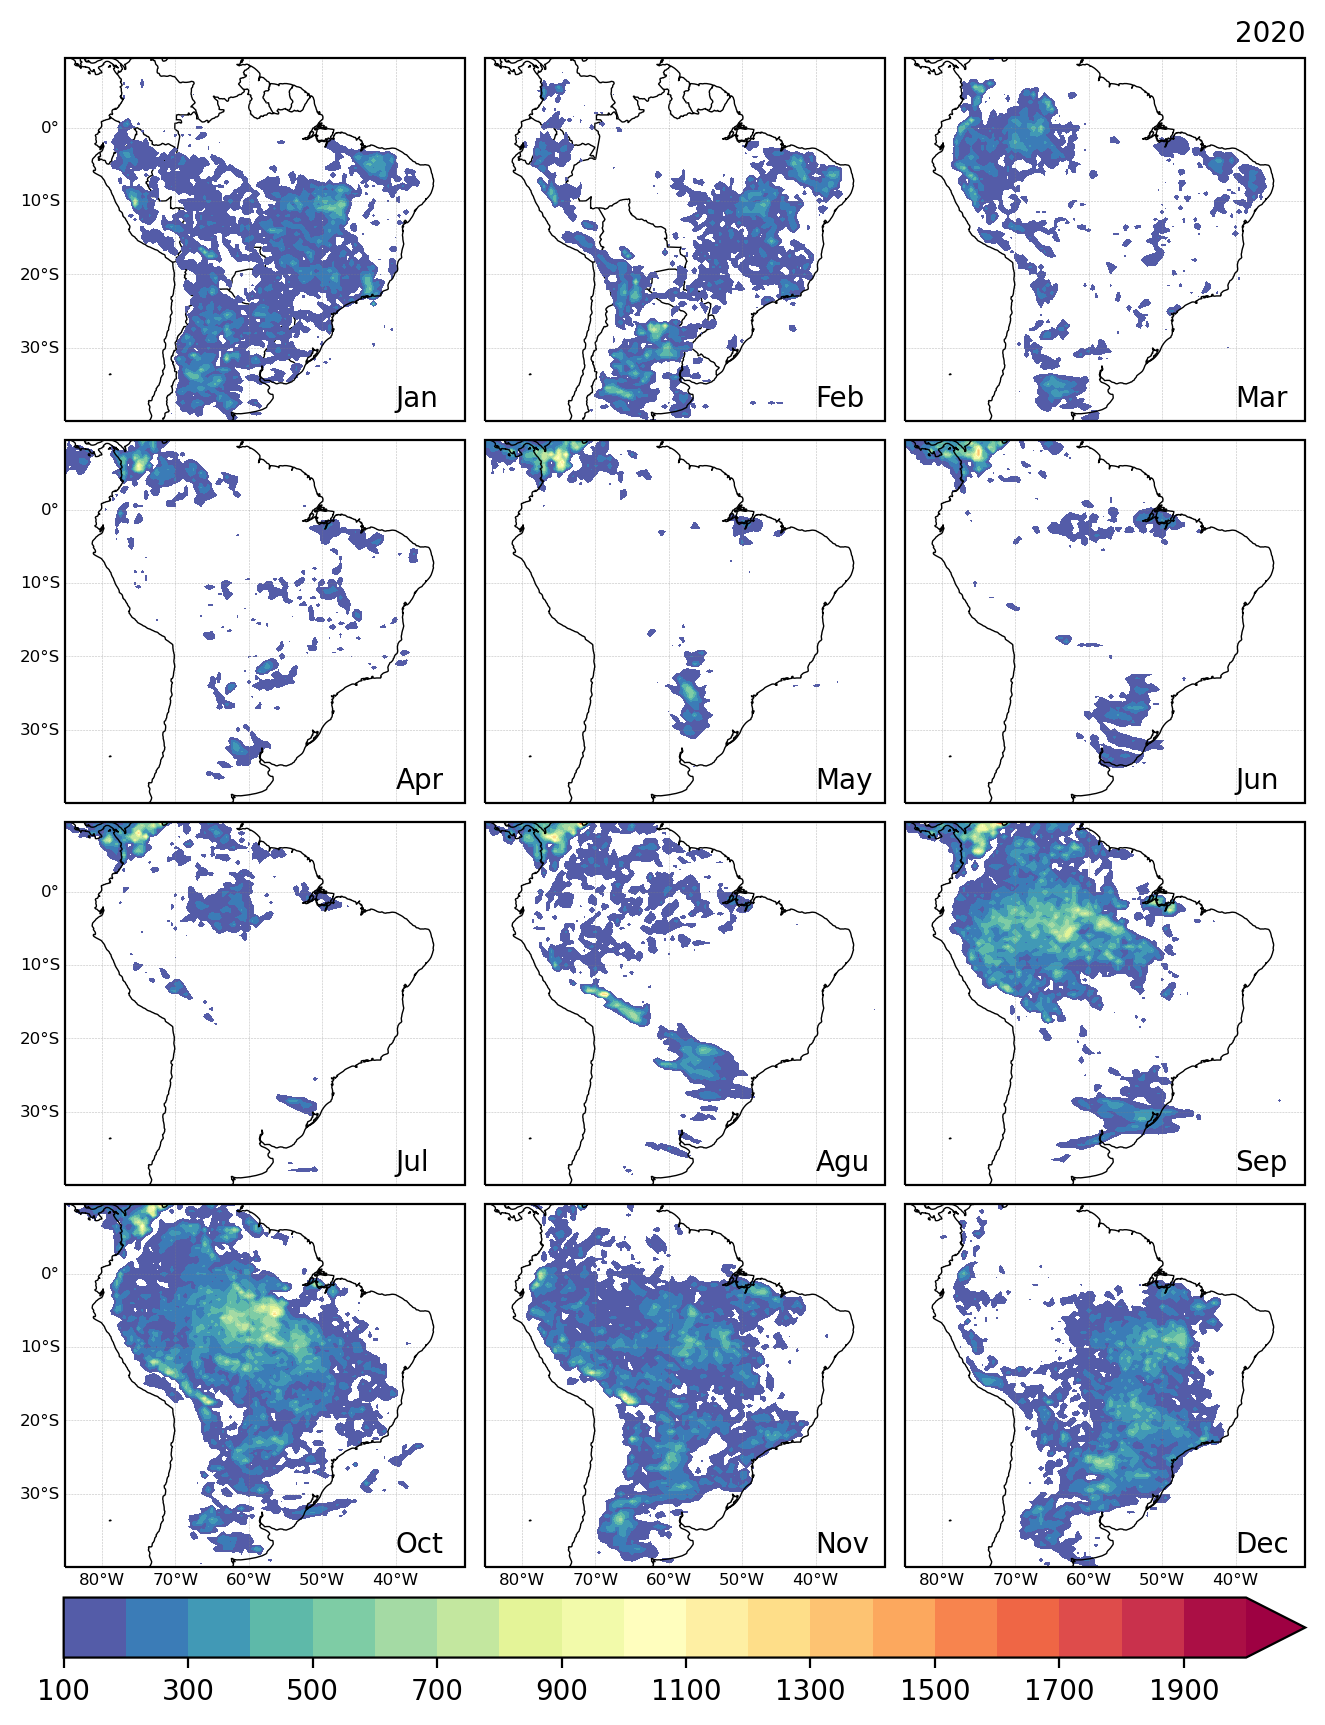

In [41]:
linewidth_shape = 0.2

flash_lvl = np.arange(100,2100,100)

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

fig = plt.figure(figsize=(8,10),dpi=200)
gs = gridspec.GridSpec(4,3)

# =====================================================================================================================================

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cf.BORDERS,linewidth=0.5)
a1 = ax1.contourf(lon2d,lat2d,flash_2020[0,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar1 = plt.colorbar(a1,fraction=0.045)
# cbar1.ax.tick_params(labelsize=7, pad=0.04)
ax1.annotate('Jan', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax2 = plt.subplot(gs[0, 1], projection = proj)
ax2.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax2.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cf.BORDERS,linewidth=0.5)
a2 = ax2.contourf(lon2d,lat2d,flash_2020[1,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar2 = plt.colorbar(a2,fraction=0.045)
# cbar2.ax.tick_params(labelsize=7, pad=0.04)
ax2.annotate('Feb', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax3 = plt.subplot(gs[0, 2], projection = proj)
ax3.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax3.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax3.add_feature(cf.BORDERS,linewidth=0.5)
a3 = ax3.contourf(lon2d,lat2d,flash_2020[2,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar3 = plt.colorbar(a3,fraction=0.045)
# cbar3.ax.tick_params(labelsize=7, pad=0.04)
ax3.set_title('2020', loc='right',fontsize=10)
ax3.annotate('Mar', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

# =====================================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.add_feature(cf.BORDERS,linewidth=0.5)
a1 = ax1.contourf(lon2d,lat2d,flash_2020[3,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar1 = plt.colorbar(a1,fraction=0.045)
# cbar1.ax.tick_params(labelsize=7, pad=0.04)
ax1.annotate('Apr', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax2 = plt.subplot(gs[1, 1], projection = proj)
ax2.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax2.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax2.add_feature(cf.BORDERS,linewidth=0.5)
a2 = ax2.contourf(lon2d,lat2d,flash_2020[4,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar2 = plt.colorbar(a2,fraction=0.045)
# cbar2.ax.tick_params(labelsize=7, pad=0.04)
ax2.annotate('May', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax3 = plt.subplot(gs[1, 2], projection = proj)
ax3.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax3.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax3.add_feature(cf.BORDERS,linewidth=0.5)
a3 = ax3.contourf(lon2d,lat2d,flash_2020[5,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar3 = plt.colorbar(a3,fraction=0.045)
# cbar3.ax.tick_params(labelsize=7, pad=0.04)
ax3.annotate('Jun', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

# =====================================================================================================================================
ax1 = plt.subplot(gs[2, 0], projection = proj)
ax1.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.add_feature(cf.BORDERS,linewidth=0.5)
a1 = ax1.contourf(lon2d,lat2d,flash_2020[6,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar1 = plt.colorbar(a1,fraction=0.045)
# cbar1.ax.tick_params(labelsize=7, pad=0.04)
ax1.annotate('Jul', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax2 = plt.subplot(gs[2, 1], projection = proj)
ax2.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax2.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax2.add_feature(cf.BORDERS,linewidth=0.5)
a2 = ax2.contourf(lon2d,lat2d,flash_2020[7,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar2 = plt.colorbar(a2,fraction=0.045)
# cbar2.ax.tick_params(labelsize=7, pad=0.04)
ax2.annotate('Agu', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax3 = plt.subplot(gs[2, 2], projection = proj)
ax3.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax3.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax3.add_feature(cf.BORDERS,linewidth=0.5)
a3 = ax3.contourf(lon2d,lat2d,flash_2020[8,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar3 = plt.colorbar(a3,fraction=0.045)
# cbar3.ax.tick_params(labelsize=7, pad=0.04)
ax3.annotate('Sep', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

# =====================================================================================================================================
ax1 = plt.subplot(gs[3, 0], projection = proj)
ax1.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.add_feature(cf.BORDERS,linewidth=0.5)
a1 = ax1.contourf(lon2d,lat2d,flash_2020[9,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar1 = plt.colorbar(a1,fraction=0.045)
# cbar1.ax.tick_params(labelsize=7, pad=0.04)
ax1.annotate('Oct', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax2 = plt.subplot(gs[3, 1], projection = proj)
ax2.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax2.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax2.add_feature(cf.BORDERS,linewidth=0.5)
a2 = ax2.contourf(lon2d,lat2d,flash_2020[10,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar2 = plt.colorbar(a2,fraction=0.045)
# cbar2.ax.tick_params(labelsize=7, pad=0.04)
ax2.annotate('Nov', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

ax3 = plt.subplot(gs[3, 2], projection = proj)
ax3.set_extent([-85,-30.5,-40,9.5],crs=proj)
ax3.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax3.add_feature(cf.BORDERS,linewidth=0.5)
a3 = ax3.contourf(lon2d,lat2d,flash_2020[11,:,:],cmap=cmap,levels=flash_lvl,extend='max')
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
# cbar3 = plt.colorbar(a3,fraction=0.045)
# cbar3.ax.tick_params(labelsize=7, pad=0.04)
ax3.annotate('Dec', xy=(-40,-38), xytext=(-40,-38),fontsize=10)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.08, 0.776, 0.03]) 
fig.colorbar(a1, cax = cbaxes,orientation="horizontal")

salida = '../images/GLM_monthly_2020.png'
print(salida)
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0, facecolor='white')
